This is a sample code from an article written on Zenn.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

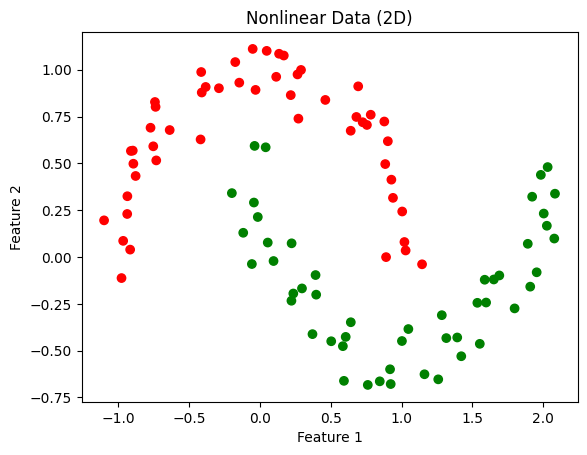

In [3]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['red', 'green'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap)
plt.title("Nonlinear Data (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma=0.5)
model.fit(X, y)

SVC(gamma=0.5)

In [5]:
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 200), np.linspace(-1, 1.5, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

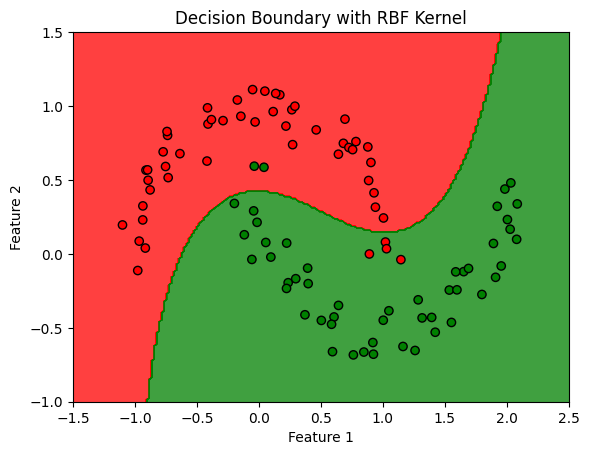

In [6]:
plt.contourf(xx, yy, Z, alpha=0.75, cmap=custom_cmap)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=custom_cmap)
plt.title("Decision Boundary with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [7]:
def rbf_projection(X, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(X, axis=1)**2)

Z = rbf_projection(X)
X_projected = np.hstack((X, Z.reshape(-1, 1)))

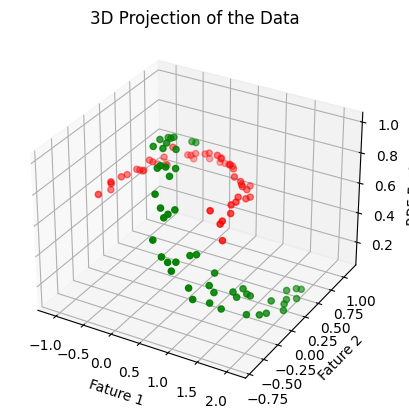

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=custom_cmap)

ax.set_xlabel('Fature 1')
ax.set_ylabel('Fature 2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection of the Data")

plt.show()

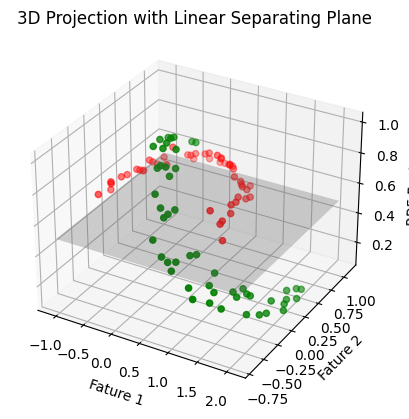

In [9]:
xx, yy = np.meshgrid(np.linspace(X_projected[:, 0].min(), X_projected[:, 0].max(), 50),
                     np.linspace(X_projected[:, 1].min(), X_projected[:, 1].max(), 50))
zz = np.full(xx.shape, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=custom_cmap)

ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel('Fature 1')
ax.set_ylabel('Fature 2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection with Linear Separating Plane")

plt.show()

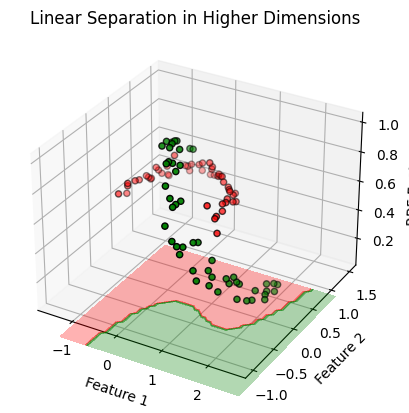

In [10]:
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 50), np.linspace(-1, 1.5, 50))
zz = rbf_projection(np.c_[xx.ravel(), yy.ravel()])
grid_3d = np.c_[xx.ravel(), yy.ravel(), zz]

Z_3d = model.predict(grid_3d[:, :2]) 
Z_3d = Z_3d.reshape(xx.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=custom_cmap, edgecolors='k')
ax.contourf(xx, yy, Z_3d, zdir='z', offset=-0.2, alpha=0.3, cmap=custom_cmap)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('RBF Feature')
plt.title("Linear Separation in Higher Dimensions")

plt.show()